# Figure 2-G

In [1]:
from libraries import *
from parameters import *


In [2]:
os.getcwd()
os.chdir(projectDir)

In [3]:
%load_ext rpy2.ipython

In [4]:
adata1 = sc.read('outputs/anndata/adata-hash-features_singlets_MultipleKO_06292020_PerGENE.h5ad')
adata2 = sc.read('outputs/anndata/adata-hash-features_singlets_SingleKO_06292020_PerGENE.h5ad')



In [5]:
adata = sc.concat([adata1, adata2], )

In [6]:
adata.shape

(323923, 6685)

In [7]:

# results = sc.get.rank_genes_groups_df(adata, group = None)
# results = results.loc[results.pvals_adj < 0.05,]
# results = results.loc[results.logfoldchanges > 0.6,]
# k = results.groupby('group').head(100)
# k.to_csv("/home/beraslan/jovian-work/analysisSingle/Leiden_top100Markers.csv", index=False)

In [8]:
adata.obs["subCellType"] = "DC2"
adata.obs.loc[adata.obs.leiden.isin(['3']), "subCellType"] = "MacDC"
adata.obs.loc[adata.obs.leiden.isin(['8']), "subCellType"] = "DC1"
adata.obs.loc[adata.obs.leiden.isin(['5']), "subCellType"] = "MReg"

In [9]:
adata.obs["phase_subCellType"] = adata.obs["phase"].astype(str) +  "_"+adata.obs["subCellType"].astype(str)

In [10]:
adata.obs["phase_subCellType"].value_counts()

G1_DC2       213380
S_DC2         47247
G2M_MacDC     32854
S_MacDC       12333
G1_MReg        7195
G2M_DC2        5136
G1_DC1         2654
S_MReg         1210
G2M_DC1         665
S_DC1           624
G1_MacDC        468
G2M_MReg        157
Name: phase_subCellType, dtype: int64

In [11]:
covariates = adata1.uns['feature_barcode_names_filtered_GENES']
covariates = covariates[covariates != "GENE_CONTROL_"]
covariates = covariates[covariates != "GENE_INEFFECT_"]

In [12]:
fBarMat = adata.obs[covariates]

In [13]:
fBarMat[fBarMat>0] = 1
fBarMat["phase_subCellType"] = adata.obs['phase_subCellType']
fBarMat.shape

/tmp/ipykernel_12265/4136609298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fBarMat[fBarMat>0] = 1
/tmp/ipykernel_12265/4136609298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fBarMat[fBarMat>0] = 1
/tmp/ipykernel_12265/4136609298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fBarMat["phase_subCellType"

(323923, 1032)

In [14]:
allGuidesPerSCT = pd.DataFrame()

for elem in covariates:
    k = pd.DataFrame(pd.crosstab(fBarMat[elem], fBarMat.phase_subCellType))
    k = k.loc[k.index == 1,]
    k["KOGuide"] = elem
    allGuidesPerSCT = allGuidesPerSCT.append(k)
    

/tmp/ipykernel_12265/2527955516.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_12265/2527955516.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_12265/2527955516.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_12265/2527955516.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_12265/2527955516.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

In [15]:
allGuidesPerSCT

phase_subCellType  G1_DC1  G1_DC2  G1_MReg  G1_MacDC  G2M_DC1  G2M_DC2  \
1                       2     368       11         0        0        8   
1                       6     519        9         1        1       14   
1                       2      99        1         2        0        3   
1                       1     128        4         0        0        2   
1                       1     243        5         1        0        3   
..                    ...     ...      ...       ...      ...      ...   
1                       4     142       10         1        2        1   
1                       0     175        5         0        1        5   
1                       7     151        5         0        0        1   
1                       0     187        2         2        0        6   
1                       3     403       21         1        1       10   

phase_subCellType  G2M_MReg  G2M_MacDC  S_DC1  S_DC2  S_MReg  S_MacDC  \
1                         0         46      0     71       1       18   
1                         0         57      3    112       4       32   
1                         0         20      0     17       0        2   
1                         0          1      0     24       5        0   
1                         0         41      1     50       1        8   
..                      ...        ...    ...    ...     ...      ...   
1                         0         41      1     24       1        8   
1                         0         25      0     32       0        6   
1                         0         27      0     46       1       11   
1                         0         30      0     45       0       10   
1                         0         58      1     65       2       18   

phase_subCellType              KOGuide  
1                  GENE_4921501E09Rik_  
1                  GENE_4930595M18Rik_  
1                  GENE_8030462N17Rik_  
1                           GENE_Aamp_  
1                          GENE_Abtb1_  
..                                 ...  
1                          GENE_Zmiz2_  
1                          GENE_Znrf2_  
1                          GENE_Znrf3_  
1                          GENE_Znrf4_  
1                          GENE_Zpbp2_  

[1031 rows x 13 columns]

In [16]:
NoOfCellsPerSubCelltype = allGuidesPerSCT[["G1_DC1", "G1_DC2", "G1_MReg", "G1_MacDC", "G2M_DC1", "G2M_DC2", "G2M_MReg", "G2M_MacDC", "S_DC1", "S_DC2", "S_MReg", "S_MacDC"]].sum(axis=0)

In [17]:
NoOfCellsPerSubCelltype

phase_subCellType
G1_DC1         2528
G1_DC2       248499
G1_MReg        7295
G1_MacDC        496
G2M_DC1         672
G2M_DC2        5997
G2M_MReg        172
G2M_MacDC     36185
S_DC1           614
S_DC2         53509
S_MReg         1203
S_MacDC       13715
dtype: int64

In [18]:
allGuidesPerSCT['noOfGuideCells'] = allGuidesPerSCT.loc[:,["G1_DC1", "G1_DC2", "G1_MReg", "G1_MacDC", "G2M_DC1", "G2M_DC2", "G2M_MReg", "G2M_MacDC", "S_DC1", "S_DC2", "S_MReg", "S_MacDC"]].sum(axis=1)

In [19]:
allGuidesPerSCT

phase_subCellType  G1_DC1  G1_DC2  G1_MReg  G1_MacDC  G2M_DC1  G2M_DC2  \
1                       2     368       11         0        0        8   
1                       6     519        9         1        1       14   
1                       2      99        1         2        0        3   
1                       1     128        4         0        0        2   
1                       1     243        5         1        0        3   
..                    ...     ...      ...       ...      ...      ...   
1                       4     142       10         1        2        1   
1                       0     175        5         0        1        5   
1                       7     151        5         0        0        1   
1                       0     187        2         2        0        6   
1                       3     403       21         1        1       10   

phase_subCellType  G2M_MReg  G2M_MacDC  S_DC1  S_DC2  S_MReg  S_MacDC  \
1                         0         46      0     71       1       18   
1                         0         57      3    112       4       32   
1                         0         20      0     17       0        2   
1                         0          1      0     24       5        0   
1                         0         41      1     50       1        8   
..                      ...        ...    ...    ...     ...      ...   
1                         0         41      1     24       1        8   
1                         0         25      0     32       0        6   
1                         0         27      0     46       1       11   
1                         0         30      0     45       0       10   
1                         0         58      1     65       2       18   

phase_subCellType              KOGuide  noOfGuideCells  
1                  GENE_4921501E09Rik_             525  
1                  GENE_4930595M18Rik_             758  
1                  GENE_8030462N17Rik_             146  
1                           GENE_Aamp_             165  
1                          GENE_Abtb1_             354  
..                                 ...             ...  
1                          GENE_Zmiz2_             235  
1                          GENE_Znrf2_             249  
1                          GENE_Znrf3_             249  
1                          GENE_Znrf4_             282  
1                          GENE_Zpbp2_             583  

[1031 rows x 14 columns]

In [20]:
# %%R -i allGuidesPerSCT -w 11 -h 8 -u in

# saveRDS(allGuidesPerSCT, "/home/beraslan/jovian-work/analysisSingle/outputs/RDSFiles/allGuidesPerSCT_CellPhase_PERGENE.rds")


R[write to console]: Error in gzfile(file, mode) : cannot open the connection

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In gzfile(file, mode) :
R[write to console]: 
 
R[write to console]:  cannot open compressed file '/home/beraslan/jovian-work/analysisSingle/outputs/RDSFiles/allGuidesPerSCT_CellPhase_PERGENE.rds', probable reason 'No such file or directory'




Error in gzfile(file, mode) : cannot open the connection


RInterpreterError: Failed to parse and evaluate line '\nsaveRDS(allGuidesPerSCT, "/home/beraslan/jovian-work/analysisSingle/outputs/RDSFiles/allGuidesPerSCT_CellPhase_PERGENE.rds")\n'.
R error message: 'Error in gzfile(file, mode) : cannot open the connection'

In [23]:
%%R  -i allGuidesPerSCT
cellGroups = c("G1_DC1", "G1_DC2", "G1_MReg", "G1_MacDC", "G2M_DC1", "G2M_DC2", "G2M_MReg", "G2M_MacDC", "S_DC1", "S_DC2", "S_MReg", "S_MacDC")

lappend <- function(lst, obj) {
  lst[[length(lst)+1]] <- obj
  return(lst)
}


#allGuidesPerSCT <- readRDS("/home/beraslan/jovian-work/analysisSingle/outputs/RDSFiles/allGuidesPerSCT_CellPhase_PERGENE.rds")
allGuidesPerSCT$KOGuide <- as.character(allGuidesPerSCT$KOGuide)
rownames(allGuidesPerSCT) <- allGuidesPerSCT$KOGuide

for(i in cellGroups){
    allGuidesPerSCT[paste0(i,"_pval_greater")] = -1
    allGuidesPerSCT[paste0(i,"_estimate_greater")] = -1
    allGuidesPerSCT[paste0(i,"_pval_less")] = -1
    allGuidesPerSCT[paste0(i,"_estimate_less")] = -1
    
}


totalCountsPerSCT <- data.frame(subCelltype = cellGroups,
                                cellCounts = colSums(allGuidesPerSCT[,cellGroups]))
rownames(totalCountsPerSCT) = totalCountsPerSCT$subCelltype
totalNoOfCells = sum(totalCountsPerSCT$cellCounts)


depletedGuides <- list()

for (elem in as.character(unique(allGuidesPerSCT$KOGuide))){
    
    
    if(allGuidesPerSCT[elem, "noOfGuideCells"] == 0){
        depletedGuides <- lappend(depletedGuides, elem)
    }else{
        
        for(subCellType in cellGroups){
           myDF = data.frame(clusterNo = c(allGuidesPerSCT[elem, subCellType], allGuidesPerSCT[elem, "noOfGuideCells"] - allGuidesPerSCT[elem, subCellType]),
                  restNo = c(totalCountsPerSCT[subCellType,"cellCounts"], totalNoOfCells - totalCountsPerSCT[subCellType,"cellCounts"]))
        
           #print(myDF)
           testRes_g <- fisher.test(x= myDF, alternative = "greater")
           #print(testRes_g)
           allGuidesPerSCT[elem, paste0(subCellType,"_pval_greater")] = testRes_g$p.value
           allGuidesPerSCT[elem, paste0(subCellType,"_estimate_greater")] = testRes_g$estimate
                        
           testRes_l <- fisher.test(x= myDF, alternative = "less")
           #print(testRes_l)
           allGuidesPerSCT[elem, paste0(subCellType,"_pval_less")] = testRes_l$p.value
           allGuidesPerSCT[elem, paste0(subCellType,"_estimate_less")] = testRes_l$estimate
                        
        }
        
    }  
}

for(i in cellGroups){
    allGuidesPerSCT[,paste0(i,"_FDR_greater")] <- p.adjust(allGuidesPerSCT[,paste0(i,"_pval_greater")])
    allGuidesPerSCT[,paste0(i,"_FDR_less")] <- p.adjust(allGuidesPerSCT[,paste0(i,"_pval_less")])  
}


#saveRDS(allGuidesPerSCT, "/home/beraslan/jovian-work/analysisSingle/outputs/RDSFiles/allGuidesPerSCT_CellPhase_PERGENE_withTests.rds")


In [24]:
# %%R -w 7 -h 10 -u in

# library("reshape2")

# allGuidesPerSCT <- readRDS("/home/beraslan/jovian-work/analysisSingle/outputs/RDSFiles/allGuidesPerSCT_CellPhase_PERGENE_withTests.rds")

# head(allGuidesPerSCT)

                    G1_DC1 G1_DC2 G1_MReg G1_MacDC G2M_DC1 G2M_DC2 G2M_MReg
GENE_4921501E09Rik_      2    368      11        0       0       8        0
GENE_4930595M18Rik_      6    519       9        1       1      14        0
GENE_8030462N17Rik_      2     99       1        2       0       3        0
GENE_Aamp_               1    128       4        0       0       2        0
GENE_Abtb1_              1    243       5        1       0       3        0
GENE_Abtb2_              8    264       8        1       0       4        1
                    G2M_MacDC S_DC1 S_DC2 S_MReg S_MacDC             KOGuide
GENE_4921501E09Rik_        46     0    71      1      18 GENE_4921501E09Rik_
GENE_4930595M18Rik_        57     3   112      4      32 GENE_4930595M18Rik_
GENE_8030462N17Rik_        20     0    17      0       2 GENE_8030462N17Rik_
GENE_Aamp_                  1     0    24      5       0          GENE_Aamp_
GENE_Abtb1_                41     1    50      1       8         GENE_Abtb1_
GENE_A

[1] 2


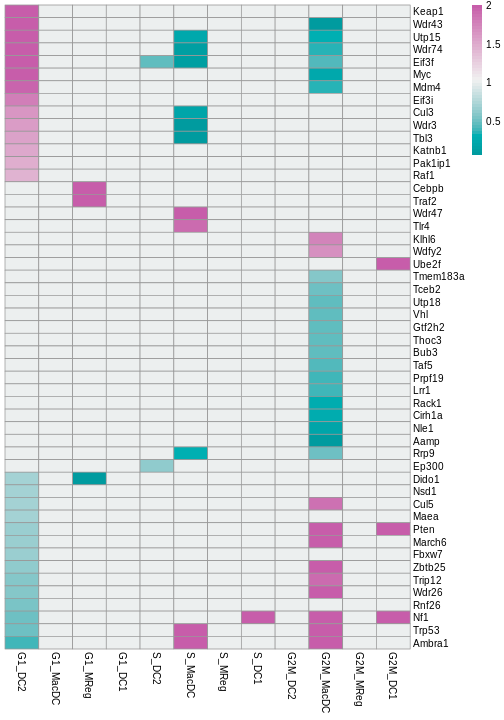

In [25]:
%%R -w 7 -h 10 -u in

library("reshape2")

#allGuidesPerSCT <- readRDS("/home/beraslan/jovian-work/analysisSingle/outputs/RDSFiles/allGuidesPerSCT_CellPhase_PERGENE_withTests.rds")

allGuidesPerSCT_FDRs <- allGuidesPerSCT[,c("G1_DC2_FDR_greater", "G1_MacDC_FDR_greater","G1_MReg_FDR_greater", "G1_DC1_FDR_greater",
                                           "S_DC2_FDR_greater", "S_MacDC_FDR_greater","S_MReg_FDR_greater", "S_DC1_FDR_greater",
                                           "G2M_DC2_FDR_greater", "G2M_MacDC_FDR_greater","G2M_MReg_FDR_greater", "G2M_DC1_FDR_greater",
                                           "G1_DC2_FDR_less", "G1_MacDC_FDR_less","G1_MReg_FDR_less", "G1_DC1_FDR_less",
                                           "S_DC2_FDR_less", "S_MacDC_FDR_less","S_MReg_FDR_less", "S_DC1_FDR_less",
                                           "G2M_DC2_FDR_less", "G2M_MacDC_FDR_less","G2M_MReg_FDR_less", "G2M_DC1_FDR_less", "KOGuide")]


allGuidesPerSCT_FDRs_melted <- melt(allGuidesPerSCT_FDRs, id.vars="KOGuide")
allGuidesPerSCT_FDRs_melted <- allGuidesPerSCT_FDRs_melted[allGuidesPerSCT_FDRs_melted$value < 0.15,]


allGuidesPerSCT_FDRs_melted$celltype <- sapply(allGuidesPerSCT_FDRs_melted$variable,
                                               function(x){strsplit(as.character(x),"_FDR_")[[1]][1]})
allGuidesPerSCT_FDRs_melted$testType <- sapply(allGuidesPerSCT_FDRs_melted$variable,
                                               function(x){strsplit(as.character(x),"_FDR_")[[1]][2]})



allGuidesPerSCT_FDRs_melted$oddRatio = 1

for(i in 1:nrow(allGuidesPerSCT_FDRs_melted)){
    allGuidesPerSCT_FDRs_melted[i,"oddRatio"] = allGuidesPerSCT[allGuidesPerSCT_FDRs_melted[i,"KOGuide"], 
                                                                paste0(allGuidesPerSCT_FDRs_melted[i,"celltype"], "_estimate_", allGuidesPerSCT_FDRs_melted[i,"testType"])]
}   

head(allGuidesPerSCT_FDRs_melted)

kk <- data.frame(matrix(1.0, nrow= 12, ncol=length(unique(allGuidesPerSCT_FDRs_melted$KOGuide))))
colnames(kk) = unique(allGuidesPerSCT_FDRs_melted$KOGuide)
rownames(kk) = c("G1_DC2", "G1_MacDC", "G1_MReg", "G1_DC1", "S_DC2", "S_MacDC", "S_MReg", "S_DC1", "G2M_DC2", "G2M_MacDC", "G2M_MReg", "G2M_DC1")


for(i in 1:nrow(allGuidesPerSCT_FDRs_melted)){
        kk[allGuidesPerSCT_FDRs_melted[i, "celltype"],  allGuidesPerSCT_FDRs_melted[i, "KOGuide"]] = allGuidesPerSCT_FDRs_melted[i, "oddRatio"]
}

dim(kk)

kk[kk > 2] = 2
# kk = t(kk)

kk <- kk[c("G1_DC2", "G1_MacDC", "G1_MReg", "G1_DC1", "S_DC2", "S_MacDC", "S_MReg", "S_DC1", "G2M_DC2", "G2M_MacDC", "G2M_MReg", "G2M_DC1"),]
kk <- data.frame(t(kk))
kk = kk[order(-kk$G1_DC2, -kk$G1_MacDC, -kk$G1_MReg, -kk$G1_DC1, -kk$S_DC2, -kk$S_MacDC, -kk$S_MReg, -kk$S_DC1, -kk$G2M_DC2, -kk$G2M_MacDC, -kk$G2M_MReg, -kk$G2M_DC1),]

rownames(kk) <- sapply(rownames(kk), function(x){strsplit(x, "_")[[1]][2]})
library(pheatmap)
xx <- pheatmap(kk,cluster_rows=F, cluster_cols=F, treeheight_col=0,
         treeheight_row=0, color=hcl.colors(50, "Tropic"),
         clustering_method="ward.D2")



In [26]:
%%R
pdf("./figures/SupFig_1AA.pdf", width=4, height=10)
grid::grid.newpage()
grid::grid.draw(xx$gtable)
dev.off()

[1] 2
